In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n_cluster = 4
nv_overlap = 10
centroid = nv_overlap * np.random.random_sample((n_cluster, 2))
print(centroid)

[[9.97146458 2.54687591]
 [6.77720438 6.45279139]
 [3.05692994 6.05793891]
 [5.7327177  1.16244208]]


In [4]:
n_samples = 200
data = np.repeat(centroid, n_samples / n_cluster, axis=0)
print(data)

[[9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]
 [9.97146458 2.54687591]


In [5]:
normal_noise = np.random.normal(loc=0, scale=0.6, size=(len(data), 2))
data = data + normal_noise
print(data)

[[ 9.32153623  3.81197175]
 [ 9.3616547   1.11936784]
 [10.38305484  2.21630326]
 [10.33832827  2.41867056]
 [10.74706064  3.14949219]
 [ 9.90001768  3.74319577]
 [ 9.52461841  3.49793474]
 [ 9.70095181  3.20364169]
 [ 9.92386295  2.47478247]
 [11.01177676  2.71139736]
 [ 9.8643819   1.71170325]
 [11.51543355  2.64820313]
 [10.24960708  2.03844801]
 [10.52703823  1.81892411]
 [ 9.99509372  2.82200049]
 [ 9.71488935  2.53932943]
 [ 9.49128015  1.87613898]
 [10.10268053  2.76608129]
 [ 9.99681118  2.97536083]
 [10.79639076  2.74708775]
 [ 9.78562643  3.62998414]
 [ 9.94767887  2.1440617 ]
 [ 9.18318596  2.24220963]
 [10.03649025  1.76852405]
 [10.80005201  2.55486026]
 [ 9.35582499  2.30382536]
 [10.10229536  3.31088762]
 [ 9.28721372  2.98732112]
 [10.21953472  1.32047865]
 [10.12229205  2.54089958]
 [ 8.91301378  2.86950514]
 [ 9.59600159  3.24374718]
 [10.115947    1.48332465]
 [ 9.90616313  2.27051952]
 [11.01929682  2.13071924]
 [10.05292822  2.06916217]
 [10.56971359  2.4983474 ]
 

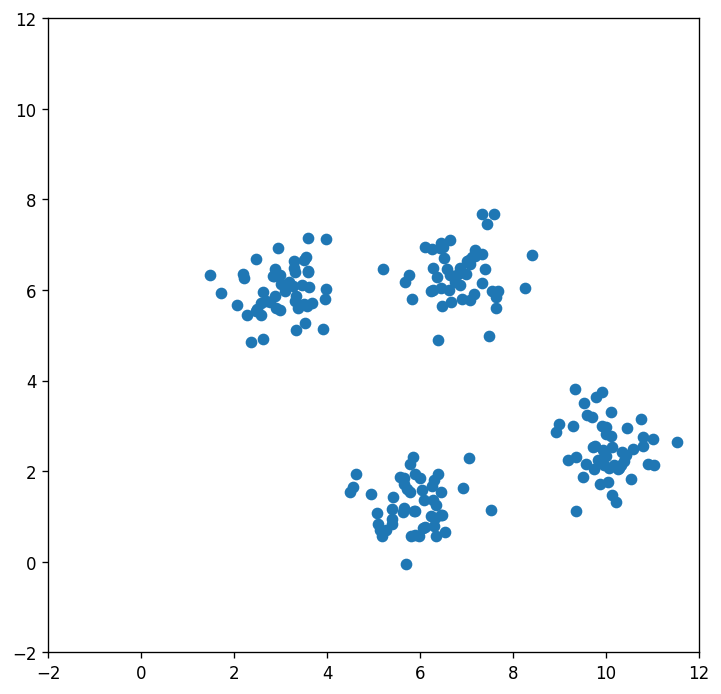

In [6]:
fig,ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter( data[:,0],data[:,1])
ax.set_xlim(-2,12)
ax.set_ylim(-2,12)
plt.show()

In [7]:
idx = np.random.choice(n_samples, n_cluster)
centroides_aleatorios = data[idx,:]
print(idx)
print(centroides_aleatorios)

[139 112 164 113]
[[2.99275693 5.56221941]
 [2.87348798 5.86916372]
 [5.27179245 0.70535935]
 [3.09922705 5.98154673]]


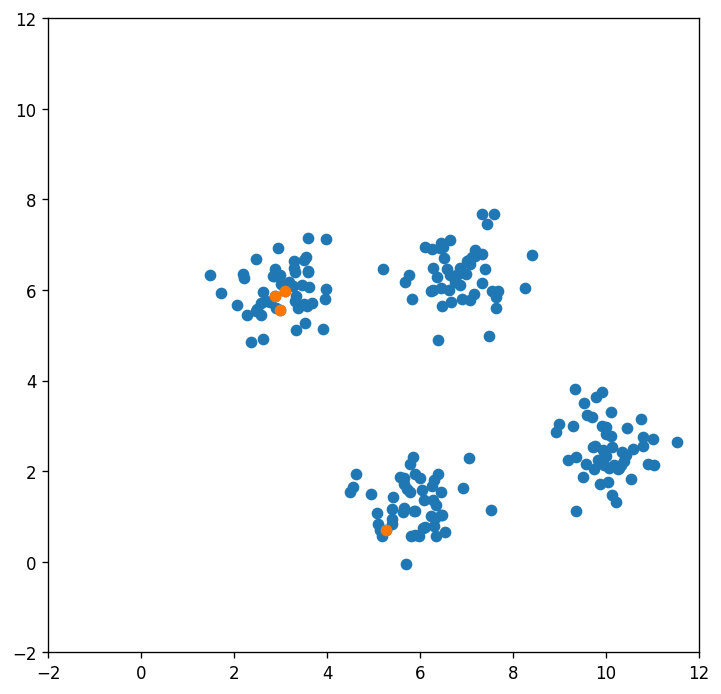

In [8]:
colores = ["#00cc44",  # Verde
           "#ff7700",  # Naranja
           "#ff0000"   # Rojo
          ]
fig,ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter( data[:,0],data[:,1] )
plt.scatter( centroides_aleatorios[:,0],centroides_aleatorios[:,1], c="#ff7700")
ax.set_xlim(-2,12)
ax.set_ylim(-2,12)
plt.show()


Calculo las distancias del resto de los puntos a mis centroides

In [9]:
def dist(a, b):
    distancia = np.sum((a - b) ** 2, axis=1) ** (1 / 2)
    return distancia

dist_centroide_1 = dist(data, centroides_aleatorios[0])
dist_centroide_2 = dist(data, centroides_aleatorios[1])
dist_centroide_3 = dist(data, centroides_aleatorios[2])
dist_centroide_4 = dist(data, centroides_aleatorios[3])

#print("Distancia de los puntos en data a C[0] es = ", dist_centroide_1)
#print("Distancia de los puntos en data a C[0] es = ", dist_centroide_2)
#print("Distancia de los puntos en data a C[0] es = ", dist_centroide_3)
#print("Distancia de los puntos en data a C[0] es = ", dist_centroide_4)


**4. Para cada punto en X se selecciona el centroide más cercano de C.**

In [10]:
def distancias_a_centroides(puntos, centroides):

    exppanded_C = centroides[:, None]
    distancias = np.sqrt(np.sum((exppanded_C - puntos) ** 2, axis=2))
    return distancias
dist_centroide = distancias_a_centroides(data, centroides_aleatorios)
arg_min = np.argmin(distancias_a_centroides(data, centroides_aleatorios), axis=0)
print(arg_min)
print(data[0])


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 1 0 0 1 0 0
 3 1 3 3 3 3 3 1 3 3 3 0 0 1 0 3 1 3 3 3 3 1 3 3 3 3 3 3 0 3 3 1 1 3 0 0 1
 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[9.32153623 3.81197175]


In [22]:
X = data
centroids = centroides_aleatorios
k = 5
maxiter = 1000

classes = np.zeros(X.shape[0], dtype=np.float64)
distances = np.zeros([X.shape[0], k], dtype=np.float64)

# Function for calculating the distance between centroids
def get_distances(centroid, points):
    """Returns the distance the centroid is from each data point in points."""
    return np.linalg.norm(points - centroid, axis=1)

for i in range(maxiter):
    
    # Assign all points to the nearest centroid
    for i, c in enumerate(centroids):
        distances[:, i] = get_distances(c, X)
        
    # Determine class membership of each point
    # by picking the closest centroid
    classes = np.argmin(distances, axis=1)
    
    # Update centroid location using the newly
    # assigned data point classes
    for c in range(k):
        centroids[c] = np.mean(X[classes == c], 0)



/home/gon/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gon/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


IndexError: index 4 is out of bounds for axis 0 with size 4

IndexError: list index out of range